[View in Colaboratory](https://colab.research.google.com/github/gmihaila/machine_learning_toolbox/blob/master/tpot_auto_ml.ipynb)

## [T Pot](https://towardsdatascience.com/tpot-automated-machine-learning-in-python-4c063b3e5de9)

More details [here](http://epistasislab.github.io/tpot/)

Optionally, you can install **XGBoost** if you would like TPOT to use the eXtreme Gradient Boosting models

Tutorial:

https://towardsdatascience.com/automated-machine-learning-on-the-cloud-in-python-47cf568859f
https://colab.research.google.com/drive/1CIVn-GoOyY3H2_Bv8z09mkNRokQ9jlJ-#scrollTo=g268joSvPGMl

In [1]:
from IPython.display import clear_output

# Install pydot
print("Installing graphiz and pydot")
!apt-get -qq install -y graphviz && pip install -q pydot
clear_output()

print("Installing tpot")
!pip install xgboost
!pip install tpot
# !pip install --upgrade --no-deps --force-reinstall git+https://github.com/weixuanfu/tpot.git@scoring_api_bug
clear_output()


print("Downloading pima-indians-diabetes")
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
clear_output()

!ls

dask-worker-space		  sample_data
pima-indians-diabetes.data.csv	  tpot_mnst1.txt
pima-indians-diabetes.data.csv.1


In [2]:
import numpy as np
import pandas as pd

from tpot import TPOTClassifier

#scikit-learn package (https://pypi.org/project/scikit-learn)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split #TAKES NUMPY OR DATA FRAME!!
from sklearn.metrics.scorer import make_scorer

import matplotlib.pyplot as plt

#Split train and test set.
RANDOM_STATE = 123

# Parse data
path_file = 'pima-indians-diabetes.data.csv'

df = pd.read_csv(path_file, header=None)

x_df = df.drop(df.columns[8],axis=1)
y_df = df[df.columns[8]]

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X, X_test, y, y_test = train_test_split(x_df, y_df, train_size=0.85, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=RANDOM_STATE)


print("Train: ", X_train.shape[0])
print("Validation: ",X_validation.shape[0])
print("Test: ",X_test.shape[0])

('Train: ', 554)
('Validation: ', 98)
('Test: ', 116)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


how to config:
https://epistasislab.github.io/tpot/api/

In [4]:
tpot = None
del tpot

tpot = TPOTClassifier(
                      verbosity=3, 
                      scoring="accuracy", 
                      random_state=23, 
                      periodic_checkpoint_folder="tpot_mnst1.txt", 
                      n_jobs=-1, 
                      generations=10, 
                      population_size=100
)

tpot.fit(X, y)

30 operators have been imported by TPOT.


Optimization Progress:   9%|▉         | 100/1100 [00:45<09:34,  1.74pipeline/s]

Saving best periodic pipeline to tpot_mnst1.txt/pipeline_2018.10.22_21-21-02.py


Optimization Progress:   9%|▉         | 100/1100 [00:46<10:47,  1.54pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:   9%|▉         | 100/1100 [00:48<10:47,  1.54pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 cosine was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:   9%|▉         | 100/1100 [00:48<10:47,  1.54pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:   9%|▉         | 100/1100 [00:50<10:47,  1.54pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:   9%|▉         | 100/1100 [00:51<10:47,  1.54pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:   9%|▉         | 100/1100 [00:53<10:47,  1.54pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  18%|█▊        | 200/1100 [02:00<09:06,  1.65pipeline/s]

Generation 1 - Current Pareto front scores:
-1	0.779172823153	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=3, RandomForestClassifier__n_estimators=100)
-2	0.782214332209	GaussianNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001))

Saving best periodic pipeline to tpot_mnst1.txt/pipeline_2018.10.22_21-22-17.py


Optimization Progress:  18%|█▊        | 200/1100 [02:09<49:56,  3.33s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False
_pre_test decorator: _random_mutation_operator: num_test=2 Input X must be non-negative


Optimization Progress:  18%|█▊        | 201/1100 [02:17<1:11:07,  4.75s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  27%|██▋       | 300/1100 [04:06<09:59,  1.33pipeline/s]

Generation 2 - Current Pareto front scores:
-1	0.782297450464	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.45, RandomForestClassifier__min_samples_leaf=11, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__n_estimators=100)

Saving best periodic pipeline to tpot_mnst1.txt/pipeline_2018.10.22_21-24-23.py


Optimization Progress:  27%|██▋       | 300/1100 [04:06<10:20,  1.29pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False


Optimization Progress:  27%|██▋       | 300/1100 [04:11<10:20,  1.29pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  27%|██▋       | 300/1100 [04:16<10:20,  1.29pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  27%|██▋       | 300/1100 [04:18<10:20,  1.29pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  27%|██▋       | 300/1100 [04:19<10:20,  1.29pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  27%|██▋       | 300/1100 [04:19<10:20,  1.29pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  27%|██▋       | 300/1100 [04:22<10:20,  1.29pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  36%|███▋      | 400/1100 [06:02<11:38,  1.00pipeline/s]

Generation 3 - Current Pareto front scores:
-1	0.782297450464	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.45, RandomForestClassifier__min_samples_leaf=11, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__n_estimators=100)
-2	0.786842007037	RandomForestClassifier(SelectPercentile(input_matrix, SelectPercentile__percentile=92), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.6000000000000001, RandomForestClassifier__min_samples_leaf=10, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)

Saving best periodic pipeline to tpot_mnst1.txt/pipeline_2018.10.22_21-26-20.py


Optimization Progress:  36%|███▋      | 400/1100 [06:03<08:54,  1.31pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  36%|███▋      | 400/1100 [06:04<08:54,  1.31pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  36%|███▋      | 400/1100 [06:05<08:54,  1.31pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  36%|███▋      | 400/1100 [06:08<08:54,  1.31pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  36%|███▋      | 400/1100 [06:13<08:54,  1.31pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  36%|███▋      | 400/1100 [06:16<08:54,  1.31pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=2 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  36%|███▋      | 400/1100 [06:17<08:54,  1.31pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:  36%|███▋      | 401/1100 [06:22<1:13:31,  6.31s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  45%|████▌     | 500/1100 [08:11<09:52,  1.01pipeline/s]

Generation 4 - Current Pareto front scores:
-1	0.782297450464	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.45, RandomForestClassifier__min_samples_leaf=11, RandomForestClassifier__min_samples_split=5, RandomForestClassifier__n_estimators=100)
-2	0.786842007037	RandomForestClassifier(SelectPercentile(input_matrix, SelectPercentile__percentile=92), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.6000000000000001, RandomForestClassifier__min_samples_leaf=10, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  45%|████▌     | 500/1100 [08:14<14:08,  1.41s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:  45%|████▌     | 500/1100 [08:28<14:08,  1.41s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  45%|████▌     | 500/1100 [08:33<14:08,  1.41s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  45%|████▌     | 500/1100 [08:34<14:08,  1.41s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  55%|█████▍    | 600/1100 [10:57<11:56,  1.43s/pipeline]

Generation 5 - Current Pareto front scores:
-1	0.785303545499	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.9000000000000001, RandomForestClassifier__min_samples_leaf=5, RandomForestClassifier__min_samples_split=15, RandomForestClassifier__n_estimators=100)
-2	0.786842007037	RandomForestClassifier(SelectPercentile(input_matrix, SelectPercentile__percentile=92), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.6000000000000001, RandomForestClassifier__min_samples_leaf=10, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  55%|█████▍    | 600/1100 [10:59<11:34,  1.39s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  55%|█████▍    | 600/1100 [11:05<11:34,  1.39s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  55%|█████▍    | 600/1100 [11:07<11:34,  1.39s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  55%|█████▍    | 600/1100 [11:08<11:34,  1.39s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  55%|█████▍    | 600/1100 [11:11<11:34,  1.39s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  55%|█████▍    | 600/1100 [11:13<11:34,  1.39s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  55%|█████▍    | 600/1100 [11:13<11:34,  1.39s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  55%|█████▍    | 600/1100 [11:22<11:34,  1.39s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False


Optimization Progress:  64%|██████▎   | 700/1100 [13:33<09:05,  1.36s/pipeline]

Generation 6 - Current Pareto front scores:
-1	0.785303545499	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.9000000000000001, RandomForestClassifier__min_samples_leaf=5, RandomForestClassifier__min_samples_split=15, RandomForestClassifier__n_estimators=100)
-2	0.793019887385	RandomForestClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True), RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=8, RandomForestClassifier__n_estimators=100)

Saving best periodic pipeline to tpot_mnst1.txt/pipeline_2018.10.22_21-33-50.py


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  64%|██████▎   | 700/1100 [13:37<07:17,  1.09s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  64%|██████▎   | 700/1100 [13:38<07:17,  1.09s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  64%|██████▎   | 700/1100 [13:39<07:17,  1.09s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 98


Optimization Progress:  64%|██████▎   | 700/1100 [13:41<07:17,  1.09s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 91


Optimization Progress:  64%|██████▎   | 700/1100 [13:48<07:17,  1.09s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  64%|██████▎   | 700/1100 [13:49<07:17,  1.09s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:  64%|██████▎   | 700/1100 [13:51<07:17,  1.09s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:  64%|██████▎   | 700/1100 [13:53<07:17,  1.09s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  73%|███████▎  | 800/1100 [15:48<05:18,  1.06s/pipeline]

Generation 7 - Current Pareto front scores:
-1	0.785303545499	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.9000000000000001, RandomForestClassifier__min_samples_leaf=5, RandomForestClassifier__min_samples_split=15, RandomForestClassifier__n_estimators=100)
-2	0.793019887385	RandomForestClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True), RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=8, RandomForestClassifier__n_estimators=100)

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  73%|███████▎  | 800/1100 [15:51<05:20,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:  73%|███████▎  | 800/1100 [15:52<05:20,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  73%|███████▎  | 800/1100 [15:52<05:20,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=1 Input X must be non-negative


Optimization Progress:  73%|███████▎  | 800/1100 [15:53<05:20,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  73%|███████▎  | 800/1100 [16:05<05:20,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  73%|███████▎  | 800/1100 [16:06<05:20,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  73%|███████▎  | 800/1100 [16:08<05:20,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  73%|███████▎  | 800/1100 [16:13<05:20,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  73%|███████▎  | 802/1100 [16:14<20:49,  4.19s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  82%|████████▏ | 900/1100 [18:16<03:17,  1.01pipeline/s]

Generation 8 - Current Pareto front scores:
-1	0.789859846054	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.9000000000000001, ExtraTreesClassifier__min_samples_leaf=1, ExtraTreesClassifier__min_samples_split=5, ExtraTreesClassifier__n_estimators=100)
-2	0.793019887385	RandomForestClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True), RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=8, RandomForestClassifier__n_estimators=100)

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  82%|████████▏ | 900/1100 [18:23<03:17,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  82%|████████▏ | 900/1100 [18:30<03:17,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 68


Optimization Progress:  82%|████████▏ | 900/1100 [18:32<03:17,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 86


Optimization Progress:  91%|█████████ | 1000/1100 [20:52<01:41,  1.01s/pipeline]

Generation 9 - Current Pareto front scores:
-1	0.792925207227	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.9500000000000001, RandomForestClassifier__min_samples_leaf=3, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)
-2	0.793019887385	RandomForestClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True), RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=8, RandomForestClassifier__n_estimators=100)

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  91%|█████████ | 1000/1100 [20:56<02:53,  1.73s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  91%|█████████ | 1000/1100 [20:58<02:53,  1.73s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  91%|█████████ | 1000/1100 [20:58<02:53,  1.73s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 59


Optimization Progress:  91%|█████████ | 1000/1100 [20:59<02:53,  1.73s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  91%|█████████ | 1000/1100 [21:04<02:53,  1.73s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances.
_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  91%|█████████ | 1000/1100 [21:07<02:53,  1.73s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  91%|█████████ | 1000/1100 [21:15<02:53,  1.73s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Generation 10 - Current Pareto front scores:
-1	0.792925207227	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.9500000000000001, RandomForestClassifier__min_samples_leaf=3, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)
-2	0.793019887385	RandomForestClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True), RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=8, RandomForestClassifier__n_estimators=100)



TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=10,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder='tpot_mnst1.txt', population_size=100,
        random_state=23, scoring='accuracy', subsample=1.0, use_dask=False,
        verbosity=3, warm_start=False)

In [5]:
tpot.score(X_test, y_test)

0.75

In [6]:
# Winning pipelines
print(tpot.fitted_pipeline_)

Pipeline(memory=None,
     steps=[('stackingestimator', StackingEstimator(estimator=BernoulliNB(alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True))), ('randomforestclassifier', RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.35, max_leaf_nodes=No...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


In [0]:
from google.colab import files

tpot.export('tpot_mnist_pipeline.py')

files.download('tpot_mnist_pipeline.py')

In [7]:
# Get predictions
y_predict = tpot.predict(X_test)

# Probability of malignant tissue produced by the model
y_prob = [probs[1] for probs in tpot.predict_proba(X_test)]

#Accuracy on test set
print("Test accuracy: %s"%(accuracy_score(y_test, y_predict).round(2)))

# Confusion matrix test set
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted NO', 'Predicted YES'],
    index=['Actual NO', 'Actual YES']
)

Test accuracy: 0.75


,Predicted NO,Predicted YES
Actual NO,61,15
Actual YES,14,26


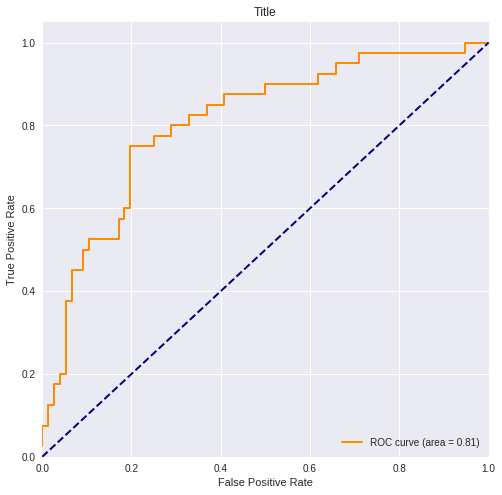

In [8]:
# Compute area under the curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Set default figure size
plt.rcParams['figure.figsize'] = (8,8)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Title")
plt.legend(loc="lower right")
plt.show()